In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

import theano
import theano.tensor as T

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

In [4]:
from pymc3_models.models.LogisticRegression import LogisticRegression

Generate Synthetic Data
===

In [5]:
num_pred = 2
num_samples = 10000

In [6]:
alphas = 5 * np.random.randn(1) + 5
betas = 10 * np.random.randn(1, num_pred) + 10

In [7]:
alphas

array([ 8.24184326])

In [8]:
betas

array([[ 9.87859496,  0.65221831]])

In [9]:
def numpy_invlogit(x):
    return 1 / (1 + np.exp(-x))

In [10]:
X = np.random.randn(num_samples, num_pred)
Y = np.random.binomial(
    1,
    numpy_invlogit(alphas[0] + np.sum(betas * X, 1))
)

Fit w/ ADVI
===

In [11]:
LR1 = LogisticRegression()

In [12]:
LR1.fit(X, Y, minibatch_size=2000, inference_args={'n': 60000})

Average Loss = 200.12: 100%|██████████| 60000/60000 [01:28<00:00, 681.00it/s]
Finished [100%]: Average Loss = 200.14


LogisticRegression()

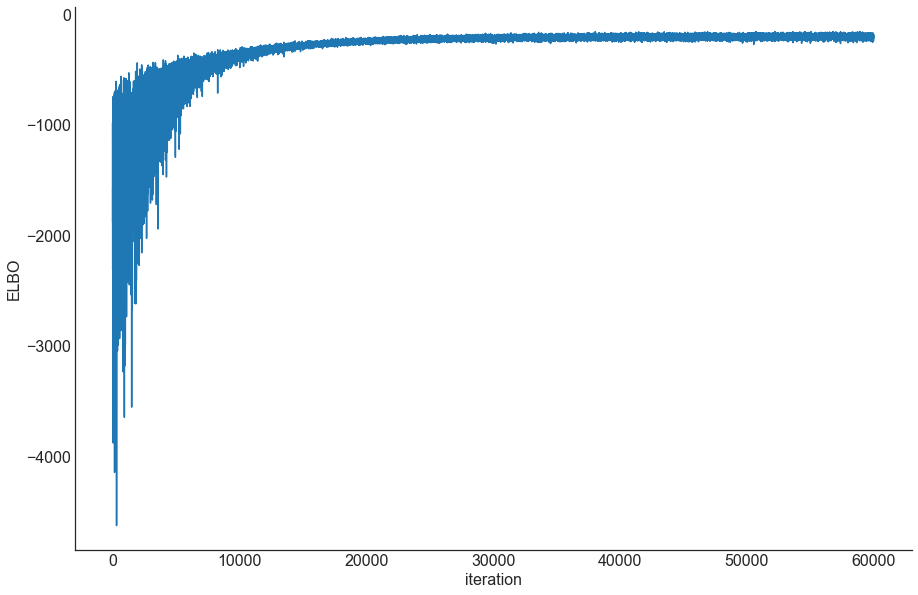

In [13]:
LR1.plot_elbo()

In [14]:
summary(LR1.trace[1000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,7.509261,0.143014,0.001412,7.235974,7.786197
betas__0_0,8.865249,0.171528,0.001603,8.521007,9.202344
betas__0_1,0.587141,0.136219,0.001407,0.310801,0.850168


In [15]:
alphas

array([ 8.24184326])

In [16]:
betas

array([[ 9.87859496,  0.65221831]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11478c160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114823320>]], dtype=object)

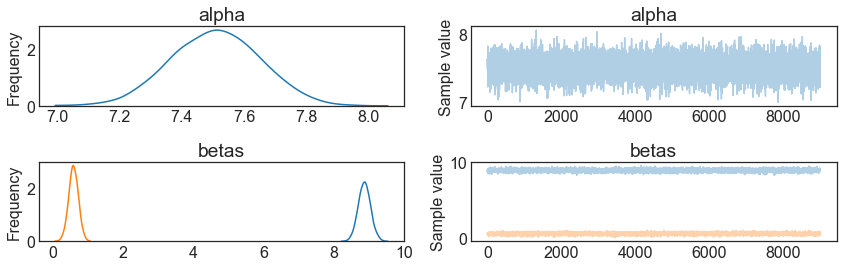

In [17]:
traceplot(LR1.trace[1000:])

In [18]:
#probs = HLM1.predict_proba(X, cats)

In [19]:
#pred = HLM1.predict(X, cats)

In [20]:
LR1.score(X, Y)

100%|██████████| 2000/2000 [00:53<00:00, 37.41it/s]


0.96319999999999995

In [21]:
LR1.save('pickle_jar/LR_jar/')

In [22]:
LR2 = LogisticRegression()

In [23]:
LR2.load('pickle_jar/LR_jar/')

In [24]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:42<00:00, 47.33it/s]


0.96399999999999997

Fit w/ NUTS
===

In [25]:
LR3 = LogisticRegression()

In [26]:
LR3.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, alpha]
Sampling 2 chains: 100%|██████████| 5000/5000 [01:11<00:00, 70.14draws/s] 
The acceptance probability does not match the target. It is 0.87947919873, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.883693636553, but should be close to 0.8. Try to increase the number of tuning steps.


LogisticRegression()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115474828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112608080>]], dtype=object)

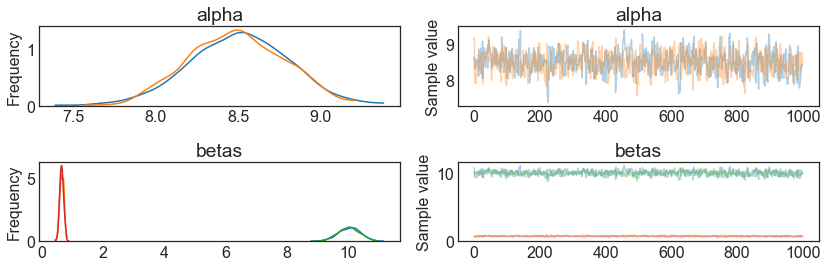

In [27]:
traceplot(LR3.trace[1000:])

In [28]:
summary(LR3.trace[1000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0,8.493336,0.296671,0.010296,7.907985,9.038403,665.233466,1.000616
betas__0_0,10.022273,0.350525,0.012068,9.348923,10.690881,670.942899,1.000702
betas__0_1,0.664440,0.065885,0.002335,0.543109,0.795412,735.396678,1.000858


In [29]:
LR3.score(X, Y)

100%|██████████| 2000/2000 [00:48<00:00, 41.19it/s]


0.96309999999999996

Compare to sklearn
===

In [30]:
from sklearn.linear_model import LogisticRegression as sklearn_LR

In [31]:
SLR = sklearn_LR()

In [32]:
SLR.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
SLR.score(X, Y)

0.96330000000000005

In [36]:
alphas

array([ 8.24184326])

In [35]:
SLR.intercept_

array([ 7.33624253])

In [37]:
betas

array([[ 9.87859496,  0.65221831]])

In [34]:
SLR.coef_

array([[ 8.64351971,  0.57303625]])